# Study of the file Doodler

## Import

In [1]:
import sys
sys.path.append("sources")
from Doodler import *
import Data_generator
import utils
import random
import numpy as np

import matplotlib.pyplot as plt

{'GLOBALS': {'data': 'data/test', 'loss': 'MSE', 'lrate': 0.01, 'wreg': 0.001, 'wrt': 'L2'}, 'LAYERS': [{'size': 10, 'act': 'relu', 'wr': [-0.1, 0.1], 'lrate': 0.01}, {'size': 10, 'act': 'relu', 'wr': [-0.1, 0.1], 'lrate': 0.01}, {'size': 10, 'act': 'sigmoid', 'wr': [-0.1, 0.1], 'lrate': 0.02}, {'size': 9, 'act': 'tanh', 'wr': [-0.1, 0.1], 'br': [0.0, 1.0]}]}


## Test

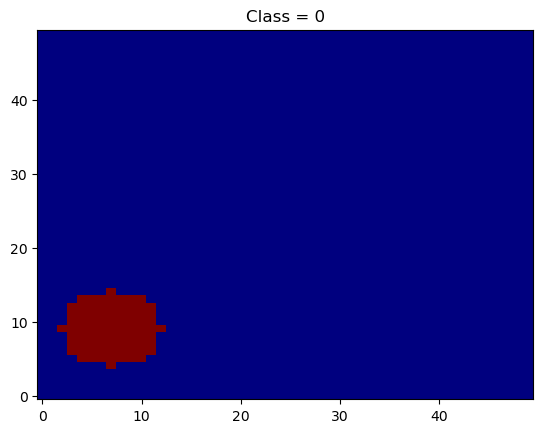

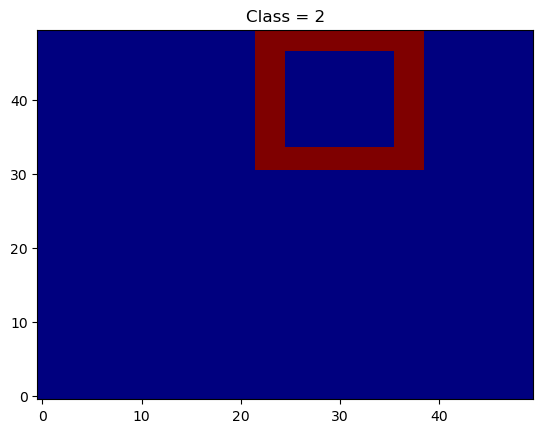

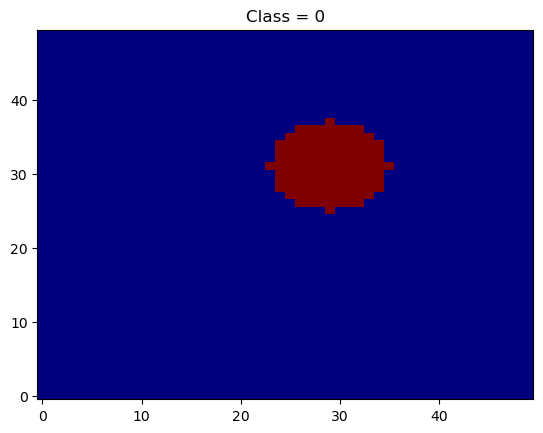

In [8]:
c = gen_standard_cases(count=3,rows=50,cols=50,wr=[0.2,0.5],hr=[0.2,0.4],
                       noise=0, cent=False, show=True, flat=False,
                       fc=(1,1),auto=False,mono=True,one_hots=True,multi=False)

In [9]:
c

(array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0]]),
 [0, 2, 0],
 (50, 50),
 False)

In [5]:
dump_doodle_cases(c,'test_cases')

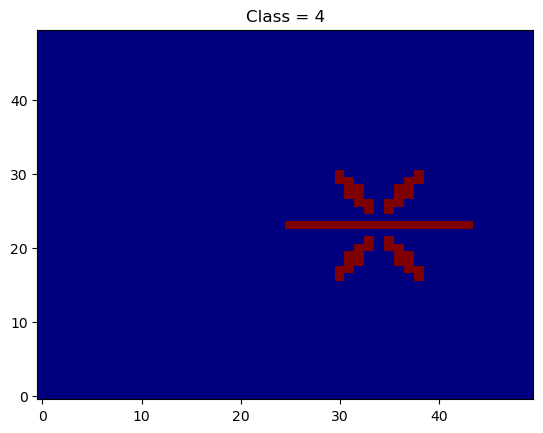

In [7]:
show_doodle_cases(c)

## Make the class for the file "Data Generator"

In [46]:
class Data_Generator():

    # Create se set of parameters for the data generator
    def __init__(self,number_data=100, n=25, noise=0, tr_size=0.7, test_size=0.2, wr=[0.3,0.7], hr=[0.3,0.7], flat=False,random_seed = None) -> None:

        # Verify that the parameters are valid
        self.validate_parameter("number_data", number_data, 1, 1000)
        self.validate_parameter("n", n, 10, 50)
        self.validate_parameter("noise", noise, 0, 1)
        self.validate_parameter("tr_size", tr_size, 0, 1)
        self.validate_parameter("test_size", test_size, 0, 1)
        self.validate_parameter("tr_size+test_size", tr_size + test_size, 0, 1, error_message="tr_size+test_size must be less than 1")
        self.validate_parameter("wr", wr[0], 0, 1,error_message="wr[0] must be less than between 0 and 1")
        self.validate_parameter("wr", wr[1], 0, 1,error_message="wr[1] must be less than between 0 and 1")
        self.validate_parameter("wr", wr[0], 0, wr[1],error_message="wr[0] must be less than wr[1]")
        self.validate_parameter("hr", hr[0], 0, 1,error_message="hr[0] must be less than between 0 and 1")
        self.validate_parameter("hr", hr[1], 0, 1,error_message="hr[1] must be less than between 0 and 1")
        self.validate_parameter("hr", hr[0], 0, hr[1],error_message="hr[0] must be less than hr[1]")
        self.validate_boolean("flat", flat)

        # Set the parameters
        self.number_data = number_data
        self.n = n
        self.noise = noise
        self.tr_size = tr_size
        self.test_size = test_size
        self.val_size = 1 - tr_size - test_size
        self.wr = wr
        self.hr = hr
        self.flat = flat
        self.random_seed = random_seed

        # Data variables
        self.tr_data = None
        self.test_data = None
        self.val_data = None

    # Fonction to raise an error if the parameters are not valid (range issues)
    def validate_parameter(self, name, value, min_value, max_value, error_message=None):
        if not min_value <= value <= max_value:
            error_message = error_message or f"{name} must be between {min_value} and {max_value}"
            raise ValueError(error_message)

    # Fonction to raise an error if the parameters are not valid (type issues)
    def validate_boolean(self, name, value):
        if type(value) != bool:
            raise TypeError(f"{name} must be a boolean")

    
    # Split the data into 3 sets
    def split_data(self,data):

        # Create a list from the range
        data_range = list(range(self.number_data))
        
        # Shuffle the list randomly
        random.shuffle(data_range)
        
        # Calculate the sizes for each set
        tr_end = int(self.tr_size * self.number_data)
        test_end = int((self.tr_size + self.test_size) * self.number_data)

        # Split the list into 3 sets
        tr_index = data_range[:tr_end]
        test_index = data_range[tr_end:test_end]
        val_index = data_range[test_end:]

        # create each set of data
        tr_data = [data[0][i] for i in tr_index]
        test_data = [data[0][i] for i in test_index]
        val_data = [data[0][i] for i in val_index]

        # target data
        tr_target = [data[1][i] for i in tr_index]
        test_target = [data[1][i] for i in test_index]
        val_target =  [data[1][i] for i in val_index]

        # labels
        tr_label = [data[2][i] for i in tr_index]
        test_label = [data[2][i] for i in test_index]
        val_label = [data[2][i] for i in val_index]

        # make the effective split
        self.tr_data = (tr_data, tr_target, tr_label, data[3], data[4])
        self.test_data = (test_data, test_target, test_label, data[3], data[4])
        self.val_data = (val_data, val_target, val_label, data[3], data[4])
        
        

    # Generate the data
    def generate_data(self,return_data=False):
        
        if self.random_seed is not None:
            random.seed(self.random_seed)
            
        # Generate the data
        data = gen_standard_cases(  count=self.number_data,rows=self.n,cols=self.n,wr=self.wr,hr=self.hr,
                                    noise=self.noise, cent=False, show=False, flat=self.flat,
                                    fc=(1,1),auto=False,mono=True,one_hots=True,multi=False)
        # Split the data
        self.split_data(data)

        # Return the data if needed
        if return_data:
            return self.get_data()

        print("Data generated")

    # Return the data
    def get_data(self):
        return self.tr_data, self.test_data, self.val_data
    
    # Save Data 
    def save_data(self, path):
        dump_doodle_cases(self.tr_data,path+"/tr_data")
        dump_doodle_cases(self.test_data,path+"/test_data")
        dump_doodle_cases(self.val_data,path+"/val_data")
        print("Data saved at : ",path)


In [137]:
# Create the data generator
data_gen = Data_Generator(number_data=100, n=25, noise=0, tr_size=0.7, test_size=0.1, wr=[0.2,0.7], hr=[0.2,0.7], flat=False,random_seed = 42)
data = data_gen.generate_data(return_data=True)
data_gen.save_data("data")


NameError: name 'Data_Generator' is not defined

Data saved at :  data/test


(array([34.,  0.,  0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  0.,  0., 36.,
         0.,  0.,  0.,  0.,  0., 40.,  0.,  0.,  0.,  0.,  0.,  0., 41.,
         0.,  0.,  0.,  0.,  0., 38.,  0.,  0.,  0.,  0.,  0., 38.,  0.,
         0.,  0.,  0.,  0., 49.,  0.,  0.,  0.,  0.,  0., 40.]),
 array([0.  , 0.16, 0.32, 0.48, 0.64, 0.8 , 0.96, 1.12, 1.28, 1.44, 1.6 ,
        1.76, 1.92, 2.08, 2.24, 2.4 , 2.56, 2.72, 2.88, 3.04, 3.2 , 3.36,
        3.52, 3.68, 3.84, 4.  , 4.16, 4.32, 4.48, 4.64, 4.8 , 4.96, 5.12,
        5.28, 5.44, 5.6 , 5.76, 5.92, 6.08, 6.24, 6.4 , 6.56, 6.72, 6.88,
        7.04, 7.2 , 7.36, 7.52, 7.68, 7.84, 8.  ]),
 <BarContainer object of 50 artists>)

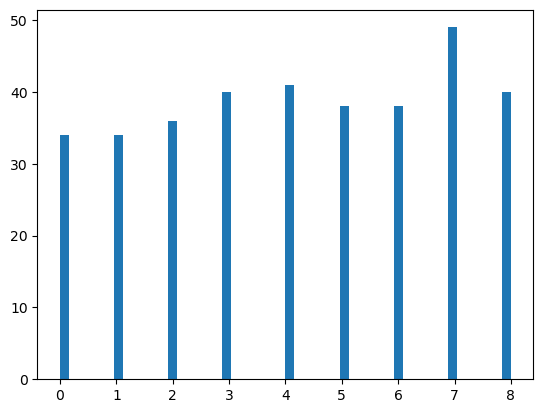

In [138]:
# Test of the Data_generator file
generator = Data_generator.Data_generator(number_data=500, n=25, noise=0, tr_size=0.7, test_size=0.1, wr=[0.2,0.7], hr=[0.2,0.7], flat=False,random_seed = 42)
data = generator.generate_data(return_data=True)
generator.save_data("data/test")

plt.hist(data[0][2], bins=50)

## Configuration file

In [13]:
# Function to read the config file
def read_config_file(file_path):
    config = {"GLOBALS": {}, "LAYERS": []}
    current_section = None

    with open(file_path, 'r') as file:
        # we read the file line by line
        for line in file:
            print(line)

            # Ignore black line or line starting with #
            if line.strip() == '' or line.startswith('#'):
                continue

            # Set the actual section (GLOBALS or LAYERS)
            if line.startswith("GLOBALS"):
                current_section = "GLOBALS"
                continue
            elif line.startswith("LAYERS"):
                current_section = "LAYERS"
                continue

            # Analyse the line
            key_value_pairs = [pair.strip() for pair in line.split(',')]
            if current_section == "GLOBALS":
                for pair in key_value_pairs:
                    key, value = pair.split(':')
                    config["GLOBALS"][key.strip()] = value.strip()
            elif current_section == "LAYERS":
                layer_info = {}
                for pair in key_value_pairs:
                    key, value = pair.split(':')
                    layer_info[key.strip()] = value.strip()
                config["LAYERS"].append(layer_info)

    return config

In [59]:
config = utils.read_config_file("config/config_test.txt")
data = Data_generator.load_data(config["GLOBALS"]["data"])
config

Data loaded from :  data/test


{'GLOBALS': {'data': 'data/test',
  'loss': 'cross_entropy',
  'lrate': 0.03,
  'wreg': 0.001,
  'wrt': 'L1'},
 'LAYERS': [{'size': 10, 'act': 'relu', 'wr': [-0.1, 0.1], 'lrate': 0.01},
  {'size': 10, 'act': 'relu', 'wr': [-0.1, 0.1], 'lrate': 0.01},
  {'size': 10, 'act': 'sigmoid', 'wr': [-0.1, 0.1], 'lrate': 0.02},
  {'size': 9, 'act': 'tanh', 'wr': [-0.1, 0.1], 'br': [0.0, 1.0]}]}

## Beginning of the NN

In [37]:
class Network():
    
    def __init__(self,config) -> None:

        global_config = config["GLOBALS"]
        layers_config = config["LAYERS"]

        # ------------------ Dictionnary Loss Function ------------------
        loss_functions = {
            "MSE": self.MSE,
            "cross_entropy": self.CE
        }

        # ------------------ Dictionnary Jacobian Loss Function ------------------
        jacobian_loss_functions = {
            "MSE": self.jacob_MSE,
            "cross_entropy": self.jacob_CE
        }

        # ------------------ Dictionnary Regularization Function ------------------
        reg_function = {
            "L1": lambda w: np.sign(w),
            "L2": lambda w: w
        }

        # ------------------ Load the data ------------------
        # Load the data with flatten images
        data = Data_generator.load_data(global_config["data"],flat=True)

        self.tr_data = data[0]                  # Training data
        self.test_data = data[1]                # Testing data
        self.val_data = data[2]                 # Validation data

        self.X_train = self.tr_data[0]                      # Training data
        self.y_train = np.array(self.tr_data[1])            # Training target
        self.X_test = self.test_data[0]                     # Testing data
        self.y_test = np.array(self.test_data[1])           # Testing target
        self.X_val = self.val_data[0]                       # Validation data
        self.y_val = np.array(self.val_data[1])             # Validation target

        # ------------------ Load the parameters ------------------
        # Load the general parameters
        self.loss_function = loss_functions[global_config["loss"]]              # Loss function
        self.jacobian_loss_function = jacobian_loss_functions[global_config["loss"]]              # Loss function jacobian
        self.lrate = global_config["lrate"]             # Learning rate
        self.wreg = global_config["wreg"]               # Weight regularization
        self.wrt_function = reg_function[global_config["wrt"]]                 # Weight regularization type

        # Load the layers
        self.layers = []
        for layer_config in layers_config:
            self.layers.append(Layer(layer_config, self.lrate, self.wreg))

            # Correct the input size of the softmax layer
            if self.layers[-1].type == "softmax":
                self.layers[-1].w = self.layers[-2].w

        # ------------------ Output parameters ------------------
        self.output = None
        self.loss = None

        # ------------------ Saving values ------------------
        self.train_loss = []
        self.test_loss = []
        self.val_loss = []
    
    # ------------------ Loss functions ------------------
    def MSE(self, output, target):
        return np.sum((output - target)**2)/output.shape[0]
        
    def CE(self, output, target):
        eps = 1e-15 # To avoid log(0)
        return -np.sum(target*np.log(output+eps))/output.shape[0]
        
    # ------------------ Initialize the weights ------------------
    def init_weights(self):
        # First Layer
        self.layers[0].init_weights(self.X_train.shape[1])
        # Other layers
        for index in range(1,len(self.layers)):
            if self.layers[index].type != "softmax":
                self.layers[index].init_weights(self.layers[index-1].size)
            
    # ------------------ Forward and backward ------------------
    def forward(self, input, target):
        """
        input : shape (number of cases, number of features)
        target : shape (number of cases, number of classes)
        """
        # First layer
        self.layers[0].forward(input)
        # Other layers
        for i in range(1,len(self.layers)):
            self.layers[i].forward(self.layers[i-1].output)
        # Set the output
        self.output = self.layers[-1].output
        
        # Calculate the loss
        self.loss = self.loss_function(self.output, target)


    def backward(self, target):
        """
        target : shape (number of cases, number of classes)
        """
        # Calculate the gradient of the loss function
        """ 
        jacob_loss : shape (number of cases, number of classes)
        """
        jacob_loss = self.jacobian_loss_function(self.output, target)

        """
        We follow the algorithm 6.4 from the book 
        """
        # We start from the last layer and go backward
        g =  jacob_loss
        for i in range(len(self.layers)-1,-1,-1):
            g = self.layers[i].backward(g,self.wrt_function)

    # ------------------ Update the weights ------------------
    def update(self):
        for i in range(len(self.layers)):
            if self.layers[i].type != "softmax":
                self.layers[i].update()

    # ------------------ Train the network ------------------
    def train(self, epochs=10):
        print("Training the network")
        for epoch in range(epochs):
            self.forward(self.X_train, self.y_train)
            self.backward(self.y_train)
            self.update()
            print("Epoch : ",epoch," Train Loss : ",self.loss)

            # Save the loss
            self.train_loss.append(self.loss)
            self.test_loss.append(self.loss_function(self.predict(self.X_val), self.y_val))
            

    # ------------------ Useful functions ------------------    
    def jacob_MSE(self, output, target):
        """
        output : shape (number cases,number of classes)
        target : shape (number cases, number of classes)
        """
        return 2*(output-target)
    
    def jacob_CE(self, output, target):
        """
        output : shape (number cases,number of classes)
        target : shape (number cases, number of classes)
        """
        eps = 1e-15 # To avoid log(0)
        return -target/(output+eps)

    # ------------------ Predict the output ------------------
    def predict(self, input):
        # First layer
        self.layers[0].forward(input)
        # Other layers
        for i in range(1,len(self.layers)):
            self.layers[i].forward(self.layers[i-1].output)
        # Set the output
        return self.layers[-1].output
    
    # ----------------- Test Score ------------------
    def test_score(self):
        return self.loss_function(self.predict(self.X_test), self.y_test)

    # ------------------ Visualize the results ------------------
    def visualize(self):
        plt.plot(self.train_loss, label="Train Loss")
        plt.plot(self.test_loss, label="Valid Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    # ------------------ Save the network ------------------
    def save(self):
        pass

    # ------------------ Load the network ------------------
    def load(self):
        pass

In [52]:
class Layer():

    def __init__(self, layer_config,network_l_rate,network_wreg) -> None:

        # ------------------ Dictionnary Activation Function ------------------
        activation_functions = {
                "sigmoid": self.sigmoid,
                "relu": self.relu,
                "tanh": self.tanh,
                "softmax": self.softmax,
                "linear": self.linear
                }
        
        # ------------------ Dictionnary Activation Derivated Function ------------------
        activation_functions_der = {
                "sigmoid": self.sigmoid_der,
                "relu": self.relu_der,
                "tanh": self.tanh_der,
                "softmax": None,
                "linear": self.linear_der
                }

        # ------------------ Load the parameters ------------------
        self.type = layer_config.get("type", "basic_layer")                      # Type of the layer

        if self.type in ["basic_layer"]:
            self.size = layer_config.get("size", 1)                              # Size of the layer
            self.w = None                                                        # Weights
            self.bias = None                                                     # Bias
            self.act = activation_functions[layer_config.get("act", "sigmoid")]  # Activation function
            self.der_act = activation_functions_der[layer_config.get("act", "sigmoid")]  # Activation derivated function
            self.wr = layer_config.get("wr", [-0.1, 0.1])                        # Weight range
            self.lrate = layer_config.get("lrate", network_l_rate)                         # Learning rate
            self.br = layer_config.get("br", [0,1])                              # Bias range
            self.wreg = layer_config.get("wreg", network_wreg)                              # Weight regularization

        elif self.type == "softmax":
            self.w = layer_config.get("size", None)                              # Size of the layer
            self.act = activation_functions["softmax"]                           # Activation function

        # ------------------  Atributes  ------------------
        self.input = None           # Input of the layer
        self.output = None          # Output of the layer
        self.grad_w = None          # Gradient of the weights
        self.grad_bias = None       # Gradient of the bias

    # -------------- List of activation functions --------------
    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def relu(self, X):
        return np.maximum(0, X)
    
    def tanh(self, X):
        return np.tanh(X)
    
    def softmax(self, X):
        exps = np.exp(X - np.max(X))
        return exps / np.sum(exps)
    
    def linear(self, X):
        return X
    
    # -------------- List of activation derivated functions --------------
    def sigmoid_der(self, X):
        return self.sigmoid(X) * (1 - self.sigmoid(X))
    
    def relu_der(self, X):
        return np.where(X <= 0, 0, 1)
    
    def tanh_der(self, X):
        return 1 - np.tanh(X)**2

    def linear_der(self, X):
        return 1
    

    # -------------- Initialize the weights --------------
    def init_weights(self,len_input):
        self.w = np.random.uniform(self.wr[0], self.wr[1], (len_input,self.size))   # verify the size !!!!
        self.bias = np.random.uniform(self.br[0], self.br[1],self.size)


    # -------------- Forward function --------------
    def forward(self, input):
        self.input = input    # Save the input
        if self.type != "softmax":
            self.output = np.dot(input,self.w) + self.bias
        else: self.output = input
        self.output = self.act(self.output)

    # -------------- Backward function --------------
    def backward(self, g, wrt_function):
        """
        g is the gradient of the last layer's output
        g : shape (number cases, number of classes)
        """

        if self.type != "softmax":
            # Converte the gradient of the layer's output into a gradient on the prenonlinearity activation
            # NOTE: it's Hadamard product
            g = g * self.der_act(self.output)

            # Gradient of weights and bias
            self.grad_w = np.mean(np.einsum('ij,ik->ijk', self.input, g), axis=0) + self.wreg * wrt_function(self.w)
            self.grad_bias = g.mean(axis=0)

            # Propagate the gradient to the next layer
            g = np.dot(g, self.w.T)

        else:
            pass
        
        return g

    # -------------- Update the weights --------------
    def update(self):
        self.w -= self.lrate * self.grad_w
        self.bias -= self.lrate * self.grad_bias

    

Data loaded from :  data/test
Data flattened
Training the network
Epoch :  0  Train Loss :  0.6885225729777584
Epoch :  1  Train Loss :  0.6460754855895781
Epoch :  2  Train Loss :  0.609539218246022
Epoch :  3  Train Loss :  0.5775413385965986
Epoch :  4  Train Loss :  0.549132050735571
Epoch :  5  Train Loss :  0.5236320239776205
Epoch :  6  Train Loss :  0.5005522007823976
Epoch :  7  Train Loss :  0.47950216526113504
Epoch :  8  Train Loss :  0.46018500805219736
Epoch :  9  Train Loss :  0.44236716295326656
Epoch :  10  Train Loss :  0.425853610347642
Epoch :  11  Train Loss :  0.41049561868105755
Epoch :  12  Train Loss :  0.39615265772220903
Epoch :  13  Train Loss :  0.3827148336796563
Epoch :  14  Train Loss :  0.3700933137989398
Epoch :  15  Train Loss :  0.35820971049071154
Epoch :  16  Train Loss :  0.3469883315336742
Epoch :  17  Train Loss :  0.33637441248947125
Epoch :  18  Train Loss :  0.3263165007208725
Epoch :  19  Train Loss :  0.31676543811634
Epoch :  20  Train Los

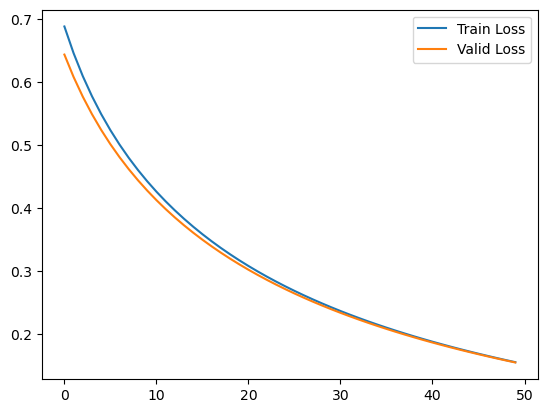

0.15245804948773153

In [56]:
config = utils.read_config_file("config/config_test.txt")
network = Network(config)
network.init_weights()
network.train(epochs=50)
network.visualize()
network.test_score()

## Visualization

In [71]:
def vizualisation_example(dataset,number=5):
    
    # pic number random index 
    index = np.random.choice(range(len(dataset[0])),number)

    # plot the pictures
    for i in range(number):
        image = dataset[0][index[i]]
        label = dataset[2][index[i]]
        quickplot_matrix(image, fs=None, title='Class = {}'.format(label))

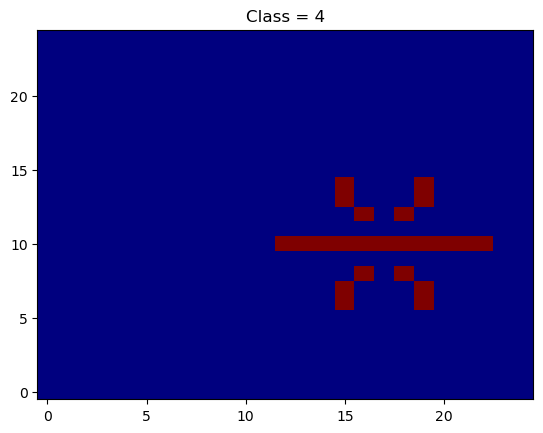

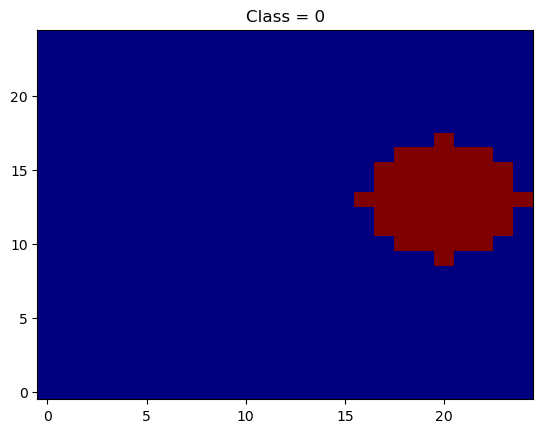

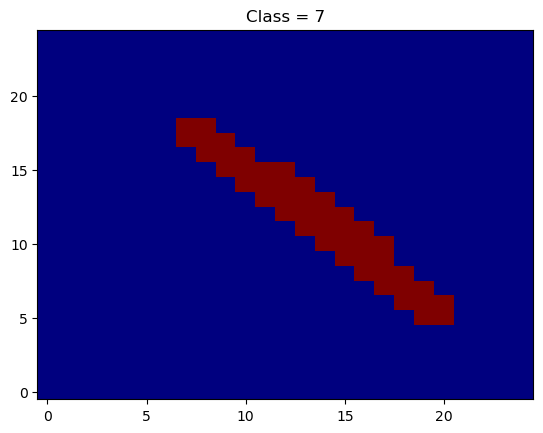

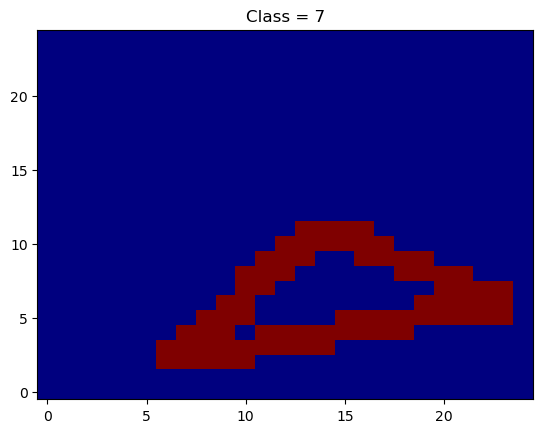

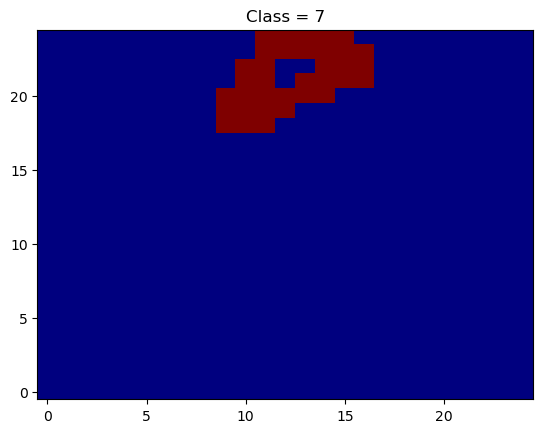

In [72]:
vizualisation_example(data[0],5)